<a href="https://colab.research.google.com/github/Pager07/TensorflowSpecialization/blob/master/C3W3-Bi-LSTMSingleLayerVsMulti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [5]:
dataset,info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset , test_dataset  = dataset['train'],dataset['test']

In [6]:
tokenizer = info.features['text'].encoder
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [4]:
train_dataset

<DatasetV1Adapter shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>

#Single layers Model

What does units refer to LSTM?
 - It's is the size of the feature space we want to work with

bidirectional (Bidirectional) layers gives 128 becuase we are stacking forward activation and backward activation [aF, aB]

In [6]:

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size,64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(units=64,activation='relu'),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS,validation_data=test_dataset)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


#Multi-layer LSTM Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
NUM_EPOCHS = 10
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 317s 810ms/step - loss: 0.5533 - accuracy: 0.7151 - val_loss: 0.6914 - val_accuracy: 0.5658
Epoch 2/10
391/391 [==============================] - 311s 796ms/step - loss: 0.5118 - accuracy: 0.7430 - val_loss: 0.6029 - val_accuracy: 0.5060
Epoch 3/10
391/391 [==============================] - 309s 791ms/step - loss: 0.4441 - accuracy: 0.8175 - val_loss: 0.4234 - val_accuracy: 0.8186
Epoch 4/10
391/391 [==============================] - 308s 787ms/step - loss: 0.2868 - accuracy: 0.8881 - val_loss: 0.3454 - val_accuracy: 0.8540
Epoch 5/10
391/391 [==============================] - 310s 793ms/step - loss: 0.2198 - accuracy: 0.9199 - val_loss: 0.3338 - val_accuracy: 0.8626
Epoch 6/10
391/391 [==============================] - 309s 791ms/step - loss: 0.1896 - accuracy: 0.9331 - val_loss: 0.3520 - val_accuracy: 0.8652
Epoch 7/10
391/391 [==============================] - 309s 791ms/step - loss: 0.1388 - accuracy: 0.9546 - val_loss: 0.4117 -

#Evalutation

In [9]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()


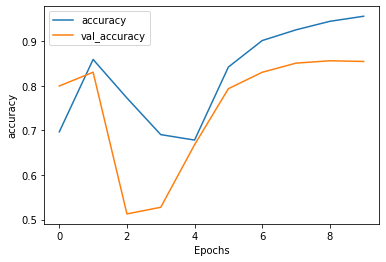

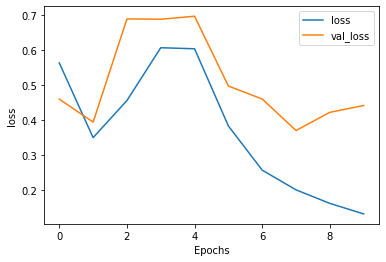

In [11]:
#Single Layer
plot_graph(history,'accuracy')
plot_graph(history,'loss')

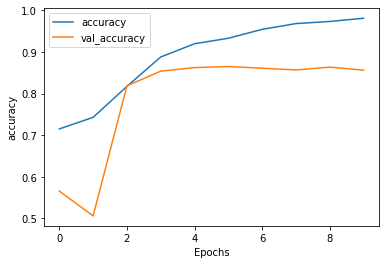

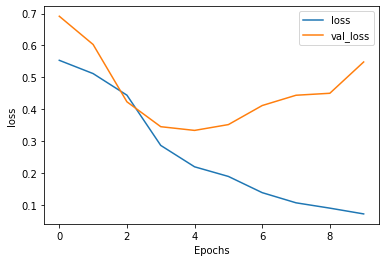

In [10]:
#Multi-layer LSTM
plot_graph(history,'accuracy')
plot_graph(history,'loss')

- The jaggyness is is a sign that the model need imporvement
- The dips makes me suspicious about the overall accuracy of the model.
- The result would look like this after 50 epochs of training
  - 

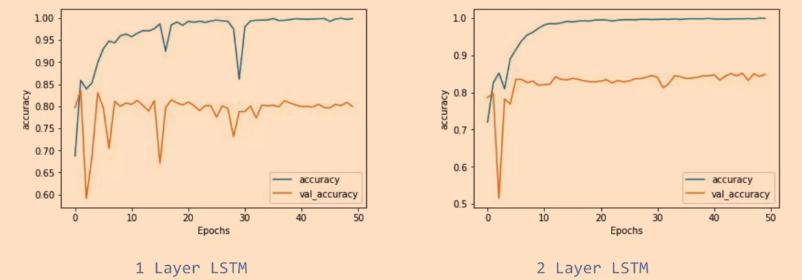